In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Nutrient Composition Dataset.csv')

In [3]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [4]:
df.iloc[:,1:5].describe().T

,count,mean,std,min,25%,50%,75%,max
Protein,1746.0,0.922470,0.627128,0.000128,0.435853,0.813025,1.295106,4.016890
Fat,1746.0,0.900091,0.634617,0.000267,0.394784,0.804687,1.298988,3.979364
vitaminC,1746.0,0.900146,0.623847,0.000029,0.419103,0.796290,1.280870,4.013322
Fibre,1746.0,0.900830,0.626875,0.002579,0.389124,0.820783,1.295732,3.570331


In [5]:
data= df.iloc[:,1:5]

In [6]:
data.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
wardlink= linkage(data,method= 'ward')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [72.5, 72.5, 117.5, 117.5],
  [25.0, 25.0, 95.0, 95.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [163.75, 163.75, 211.25, 211.25],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [261.25, 261.25, 311.25, 311.25],
  [187.5, 187.5, 286.25, 286

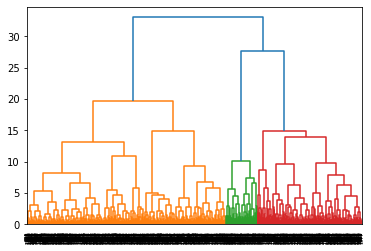

In [9]:
dendrogram(wardlink)

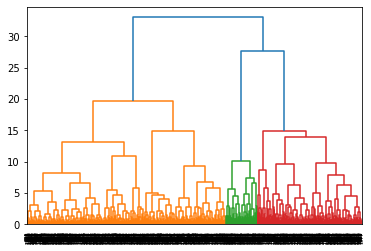

In [10]:
dend= dendrogram(wardlink)

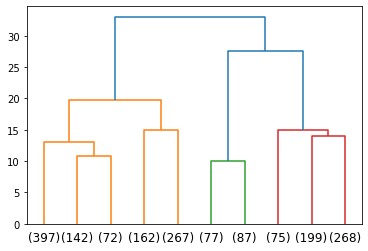

In [11]:
dend= dendrogram(wardlink,truncate_mode='lastp', p= 10)

In [12]:
from scipy.cluster.hierarchy import fcluster

In [13]:
# Method 1
clusters = fcluster(wardlink, 3, criterion ='maxclust')
clusters

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [14]:
# Method 2

clusters1 = fcluster(wardlink, 23, criterion ='distance')
clusters1

array([1, 1, 2, ..., 1, 1, 3], dtype=int32)

In [15]:
df['clusters']=clusters

In [16]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product,clusters
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",1
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",1


In [17]:
df.to_csv('hc.csv')

In [18]:
dfc= pd.read_csv('Cust_Spend_Data_New.csv')

In [19]:
from sklearn.cluster import KMeans
%matplotlib inline

In [20]:
dfc.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,Abraham,1123,28,1,16,14
1,2,Adela,9818,13,5,2,5
2,3,Adelina,9824,10,10,2,2
3,4,Adrian,3097,23,2,8,9
4,5,Adrianna,817,28,1,17,17


In [21]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          829 non-null    int64 
 1   Name             829 non-null    object
 2   Avg_Mthly_Spend  829 non-null    int64 
 3   No_Of_Visits     829 non-null    int64 
 4   Apparel_Items    829 non-null    int64 
 5   FnV_Items        829 non-null    int64 
 6   Staples_Items    829 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 45.5+ KB


In [22]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
Cust_ID,829.0,415.000000,239.455981,1.0,208.0,415.0,622.0,829.0
Avg_Mthly_Spend,829.0,4801.276236,2056.494189,549.0,4156.0,4516.0,4910.0,10000.0
No_Of_Visits,829.0,17.856454,4.367192,2.0,15.0,18.0,20.0,29.0
Apparel_Items,829.0,3.961399,2.056204,0.0,3.0,4.0,5.0,10.0
FnV_Items,829.0,7.623643,3.665773,1.0,6.0,7.0,8.0,19.0
Staples_Items,829.0,8.338963,4.250284,0.0,5.0,8.0,10.0,20.0


In [23]:
dfc.duplicated().sum()

0

In [24]:
Cust_df = dfc.drop(['Name','Cust_ID'], axis= 1)

In [25]:
Cust_df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1123,28,1,16,14
1,9818,13,5,2,5
2,9824,10,10,2,2
3,3097,23,2,8,9
4,817,28,1,17,17


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
x= StandardScaler()

In [28]:
scaled_df = x.fit_transform(Cust_df)

In [29]:
scaled_df

array([[-1.7896947 ,  2.32407237, -1.44109551,  2.28639713,  1.33272373],
       [ 2.44092704, -1.1127025 ,  0.50541069, -1.53502065, -0.78605994],
       [ 2.44384639, -1.80005748,  2.93854344, -1.53502065, -1.49232116],
       ...,
       [-0.14707492, -0.65446585,  0.01878414,  0.10272982,  0.15562169],
       [-0.35629486,  0.49112577,  0.01878414, -0.17022859,  0.3910421 ],
       [-0.03468002,  0.03288912,  0.50541069,  0.10272982,  0.15562169]])

In [30]:
K_means = KMeans(n_clusters = 2)

In [31]:
K_means.fit(scaled_df)

KMeans(n_clusters=2)

In [32]:
K_means.labels_

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [33]:
K_means.inertia_

2225.8180780994685

In [34]:
K_means = KMeans(n_clusters = 3)
K_means.fit(scaled_df)
K_means.inertia_

1074.382380298951

In [35]:
K_means = KMeans(n_clusters = 4)
K_means.fit(scaled_df)
K_means.inertia_

909.4495242917942

In [36]:
wss= []

In [37]:
for i in range (1,11):
    KM= KMeans(n_clusters =i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [38]:
wss

[4145.0,
 2225.8180780994685,
 1074.382380298951,
 909.4453294086204,
 813.1990732162753,
 721.8543295453119,
 628.7591370128824,
 587.5317026432726,
 539.3409666443785,
 508.6028440086731]

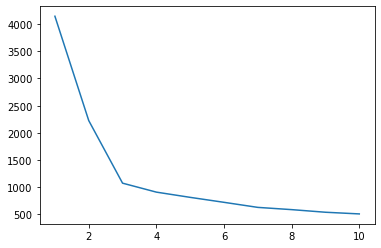

In [39]:
plt.plot(range(1,11),wss);

In [40]:
K_means = KMeans(n_clusters = 3)
K_means.fit(scaled_df)
K_means.labels_

array([2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0,
       2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 1,

In [41]:
labels=K_means.labels_

In [42]:
dfc['Clus_Kmeans'] = labels

In [43]:
dfc.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_Kmeans
0,1,Abraham,1123,28,1,16,14,2
1,2,Adela,9818,13,5,2,5,0
2,3,Adelina,9824,10,10,2,2,0
3,4,Adrian,3097,23,2,8,9,1
4,5,Adrianna,817,28,1,17,17,2


In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [45]:
silhouette_score(scaled_df, labels)

0.5863370901372584

In [46]:
sil_width= silhouette_samples(scaled_df, labels)
sil_width

array([0.65605464, 0.51242446, 0.58238018, 0.37519676, 0.70316661,
       0.21533883, 0.40883241, 0.53016965, 0.36212368, 0.46435202,
       0.53273181, 0.38251421, 0.45638838, 0.54265228, 0.59946695,
       0.58742145, 0.70669699, 0.52804742, 0.50993649, 0.51621198,
       0.46439947, 0.45916516, 0.43727811, 0.66885372, 0.58985762,
       0.61143772, 0.29967741, 0.62514869, 0.64122086, 0.67914798,
       0.69348064, 0.41267202, 0.69288439, 0.0820282 , 0.67147334,
       0.65179887, 0.55169861, 0.19310875, 0.57929786, 0.66911281,
       0.54933109, 0.61843536, 0.64293749, 0.64770225, 0.61059923,
       0.42515881, 0.55014745, 0.62945221, 0.4170128 , 0.51390593,
       0.0763273 , 0.61962009, 0.07671105, 0.57562558, 0.47135448,
       0.49643811, 0.68152376, 0.6270269 , 0.37620108, 0.54238286,
       0.39114866, 0.65826701, 0.61888157, 0.62445611, 0.52587586,
       0.23652939, 0.30229326, 0.65941125, 0.67937278, 0.56388553,
       0.60899332, 0.58244297, 0.39735031, 0.4988705 , 0.65145

In [47]:
dfc['sil_width'] = sil_width

In [48]:
dfc.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Clus_Kmeans,sil_width
0,1,Abraham,1123,28,1,16,14,2,0.656055
1,2,Adela,9818,13,5,2,5,0,0.512424
2,3,Adelina,9824,10,10,2,2,0,0.582380
3,4,Adrian,3097,23,2,8,9,1,0.375197
4,5,Adrianna,817,28,1,17,17,2,0.703167


In [49]:
silhouette_samples (scaled_df,labels).min()

0.04131038567750352

In [50]:
dfc.to_csv('Customerdataanalyzed')

In [51]:
np.random.seed(7)

In [52]:
array=np.array(np.random.rand(20)).reshape(10,2)

In [53]:
array

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587],
       [0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904],
       [0.38094113, 0.06593635],
       [0.2881456 , 0.90959353],
       [0.21338535, 0.45212396],
       [0.93120602, 0.02489923]])

In [54]:
scaled_ar = x.fit_transform(array)

In [55]:
scaled_ar

array([[-1.39522475,  0.93201877],
       [-0.1296922 ,  0.7523863 ],
       [ 1.75612561,  0.16382359],
       [ 0.08948178, -1.32037931],
       [-0.72373342,  0.04095785],
       [ 0.71196956,  1.00781355],
       [-0.33054158, -1.33983624],
       [-0.65485934,  1.34463703],
       [-0.91614429, -0.11100733],
       [ 1.59261863, -1.47041422]])

In [58]:
silhouette_score(scaled_ar,labels)

ValueError: Found input variables with inconsistent numbers of samples: [10, 829]

In [59]:
data= pd.read_csv('leaf_data_uci_updated.csv')

In [60]:
data.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11   Third moment              340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [65]:
data.duplicated().sum()


0

In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Eccentricity,340.0,0.719854,0.208311,0.117080,0.550622,0.763450,0.895097,0.998710
Aspect Ratio,340.0,1.902051,0.888783,1.006600,1.211300,1.570750,2.343100,4.040800
Elongation,340.0,0.513760,0.195583,0.107610,0.349623,0.501855,0.633373,0.948340
Solidity,340.0,0.919101,0.075247,0.761323,0.890667,0.948130,0.976897,0.993880
Stochastic Convexity,340.0,0.975867,0.032506,0.915575,0.966230,0.992980,1.000000,1.000000
Isoperimetric Factor,340.0,0.531234,0.217532,0.078376,0.346818,0.579160,0.700712,0.858160
Maximal Indentation Depth,340.0,0.034647,0.031502,0.002837,0.009521,0.023860,0.047834,0.105303
Lobedness,340.0,0.284499,0.365318,0.001464,0.016500,0.103615,0.416433,1.016331
Average Intensity,340.0,0.051209,0.035518,0.005022,0.022843,0.042087,0.073046,0.148349
Average Contrast,340.0,0.124535,0.051860,0.033415,0.083362,0.119375,0.163795,0.280810


In [68]:
scaled_data = x.fit_transform(data)

In [69]:
scaled_data

array([[ 0.03406572, -0.48209894, -0.97186457, ..., -0.0993394 ,
        -0.24107626,  0.02220937],
       [ 0.10516996, -0.42406912, -0.78138363, ..., -0.66180812,
        -0.83677884, -0.79802302],
       [ 0.22771539, -0.37133521, -0.6338121 , ..., -1.06006173,
        -0.94670245, -1.23143573],
       ...,
       [-1.76156859, -0.97935258,  1.37079505, ...,  2.32734448,
         0.28950626,  0.90903502],
       [-0.57678648, -0.85563074,  1.03207692, ...,  0.11405691,
        -0.27155102, -0.01717466],
       [-1.19182128, -0.91490004,  1.74264253, ...,  1.73998658,
        -0.0808678 ,  0.68437481]])

In [70]:
 K_means = KMeans(n_clusters = 4)

In [71]:
K_means.fit(scaled_data)

KMeans(n_clusters=4)

In [74]:
K_means = KMeans(n_clusters = 4)
K_means.fit(scaled_df)
K_means.labels_

array([1, 2, 2, 3, 1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 1, 3, 2,
       2, 1, 1, 2, 3, 1, 1, 1, 1, 3, 0, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 3, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3,
       3, 1, 1, 1, 1, 2, 3, 2, 1, 0, 2, 0, 2, 0, 2, 2, 3, 2, 1, 2, 2, 2,
       0, 3, 1, 0, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 1, 2, 3, 1, 2, 2, 2, 1,
       2, 2, 2, 3, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2,
       1, 1, 3, 3, 0, 2, 3, 3, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 2, 1, 1, 3, 3, 1, 0, 2, 0, 2, 3, 1, 1, 3, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 1, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 1, 2, 3, 1, 3, 2, 2, 3, 1, 1, 3, 1, 1, 1, 3, 2, 1, 3, 1, 2,
       2, 2, 0, 3, 1, 1, 2, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3, 1, 1, 1, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 2, 2, 0, 2, 1, 3, 1, 2, 1, 1, 2,
       3, 1, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 0, 2, 1, 1, 2, 3, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 2, 3,

In [76]:
data.columns

Index(['Eccentricity', 'Aspect Ratio', 'Elongation', 'Solidity',
       'Stochastic Convexity', 'Isoperimetric Factor',
       'Maximal Indentation Depth', 'Lobedness', 'Average Intensity',
       ' Average Contrast', 'Smoothness', ' Third moment', 'Uniformity',
       'Entropy'],
      dtype='object')

In [81]:
data['Eccentricity'] = data['Eccentricity'].apply(np.int64)
data['Aspect Ratio'] = data['Aspect Ratio'].apply(np.int64)
data['Elongation'] = data['Elongation'].apply(np.int64)
data['Solidity'] = data['Solidity'].apply(np.int64)
data['Stochastic Convexity'] = data['Stochastic Convexity'].apply(np.int64)
data['Isoperimetric Factor'] = data['Isoperimetric Factor'].apply(np.int64)
data['Maximal Indentation Depth'] = data['Maximal Indentation Depth'].apply(np.int64)
data['Lobedness'] = data['Lobedness'].apply(np.int64)
data['Average Intensity'] = data['Average Intensity'].apply(np.int64)
data['Smoothness'] = data['Smoothness'].apply(np.int64)
data[' Third moment'] = data[' Third moment'].apply(np.int64)
data['Uniformity'] = data['Uniformity'].apply(np.int64)
data['Entropy'] = data['Entropy'].apply(np.int64)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    int64  
 1   Aspect Ratio               340 non-null    int64  
 2   Elongation                 340 non-null    int64  
 3   Solidity                   340 non-null    int64  
 4   Stochastic Convexity       340 non-null    int64  
 5   Isoperimetric Factor       340 non-null    int64  
 6   Maximal Indentation Depth  340 non-null    int64  
 7   Lobedness                  340 non-null    int64  
 8   Average Intensity          340 non-null    int64  
 9    Average Contrast          340 non-null    float64
 10  Smoothness                 340 non-null    int64  
 11   Third moment              340 non-null    int64  
 12  Uniformity                 340 non-null    int64  
 13  Entropy                    340 non-null    int64  

In [83]:
scaled_data = x.fit_transform(data)

In [84]:
scaled_data

array([[ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        ,  0.54670622],
       [ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        , -1.01531155],
       [ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        , -1.01531155],
       ...,
       [ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        ,  0.54670622],
       [ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        ,  0.54670622],
       [ 0.        , -0.6011334 ,  0.        , ...,  0.        ,
         0.        ,  0.54670622]])

In [85]:
 K_means = KMeans(n_clusters = 4)

In [86]:
K_means = KMeans(n_clusters = 4)
K_means.fit(scaled_data)
K_means.intertia_

AttributeError: 'KMeans' object has no attribute 'intertia_'

In [87]:
wss=[]

In [88]:
K_means = KMeans(n_clusters = 4)
K_means.fit(scaled_data)
K_means.inertia_

718.447337852361

In [89]:
for i in range (1,11):
    KM= KMeans(n_clusters =i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [90]:
wss

[1700.0,
 1212.9410700413534,
 937.0977753017247,
 718.4162194461348,
 542.7474548682236,
 437.5093432106425,
 357.5409929752787,
 300.7547639966144,
 257.9774695684356,
 225.94136774112064]

In [99]:
K_means = KMeans(n_clusters = 4, random_state =0)
km=K_means.fit(scaled_data)
print(round(km.inertia_,2))


718.45
